In [206]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [207]:
df=pd.read_csv('Final_Test.csv')

In [208]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [209]:
df.shape

(1987, 6)

In [210]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [211]:
df.shape

(1987, 6)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [213]:
df.isnull()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,False,False,True,False,False,True
1,False,False,True,False,False,True
2,False,False,False,False,False,False
3,False,False,True,False,False,True
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1982,False,False,True,False,False,True
1983,False,False,True,False,False,True
1984,False,False,True,False,False,True
1985,False,False,False,False,False,False


In [214]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

 Null values present in Rating,Place,Miscellaneous_Info.

In [215]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [216]:
df.shape

(1987, 6)

In [217]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
df['Rating']=imp.fit_transform(df['Rating'].values.reshape(-1,1))
df['Place']=imp.fit_transform(df['Place'].values.reshape(-1,1))
df['Miscellaneous_Info']=imp.fit_transform(df['Miscellaneous_Info'].values.reshape(-1,1))


In [218]:
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

In [219]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,100%,"Ghatkopar East, Mumbai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,100%,"West Marredpally, Hyderabad",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,100%,"New Ashok Nagar, Delhi",Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


we need to change string variable into numerical value.

In [220]:
from sklearn.preprocessing import LabelEncoder


le=LabelEncoder()

df['Qualification']=le.fit_transform(df['Qualification'])
df['Experience']=le.fit_transform(df['Experience'])
df['Place']=le.fit_transform(df['Place'])
df['Profile']=le.fit_transform(df['Profile'])
df['Rating']=le.fit_transform(df['Rating'])
df['Miscellaneous_Info']=le.fit_transform(df['Miscellaneous_Info'])



In [221]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,241,28,0,142,4,598
1,340,24,0,580,3,598
2,258,34,9,212,2,153
3,6,0,0,374,0,598
4,79,7,0,231,1,816


In [222]:
df.shape

(1987, 6)

In [223]:
df.dtypes

Qualification         int32
Experience            int32
Rating                int32
Place                 int32
Profile               int32
Miscellaneous_Info    int32
dtype: object

In [224]:
df.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,259.979869,21.884248,9.791646,288.894313,2.508807,573.318067
std,185.961177,18.772896,14.259001,174.094298,1.654223,238.453687
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,6.000000,0.000000,137.000000,1.000000,494.500000
50%,241.000000,15.000000,0.000000,289.000000,2.000000,598.000000
75%,417.000000,35.000000,27.000000,439.000000,4.000000,636.500000
max,629.000000,56.000000,35.000000,591.000000,5.000000,1083.000000


skewness present in Qualification,Rating, Experience and Profile.
outliers present Qualification,Experience,Place and Miscellaneous_Info.

In [225]:
df_cor=df.corr()
df_cor

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
Qualification,1.000000,0.018786,0.073686,0.022150,0.372002,-0.145530
Experience,0.018786,1.000000,-0.163647,0.003424,0.017496,0.027695
Rating,0.073686,-0.163647,1.000000,-0.014828,-0.096923,-0.120425
Place,0.022150,0.003424,-0.014828,1.000000,-0.002778,0.038686
Profile,0.372002,0.017496,-0.096923,-0.002778,1.000000,-0.177041
Miscellaneous_Info,-0.145530,0.027695,-0.120425,0.038686,-0.177041,1.000000


<AxesSubplot:>

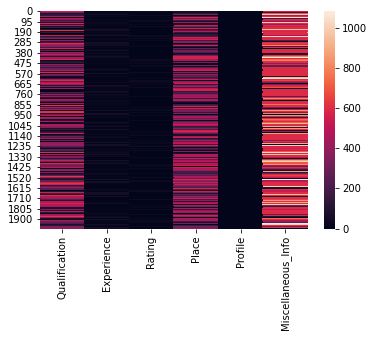

In [226]:
sns.heatmap(df)

No null values present.

<AxesSubplot:>

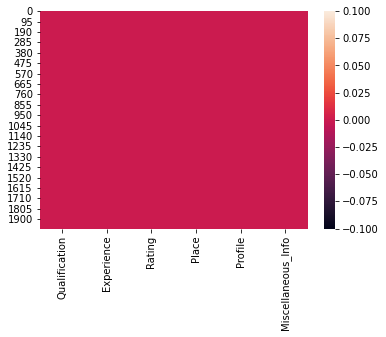

In [227]:
sns.heatmap(df.isnull())

No Null values present.

<AxesSubplot:>

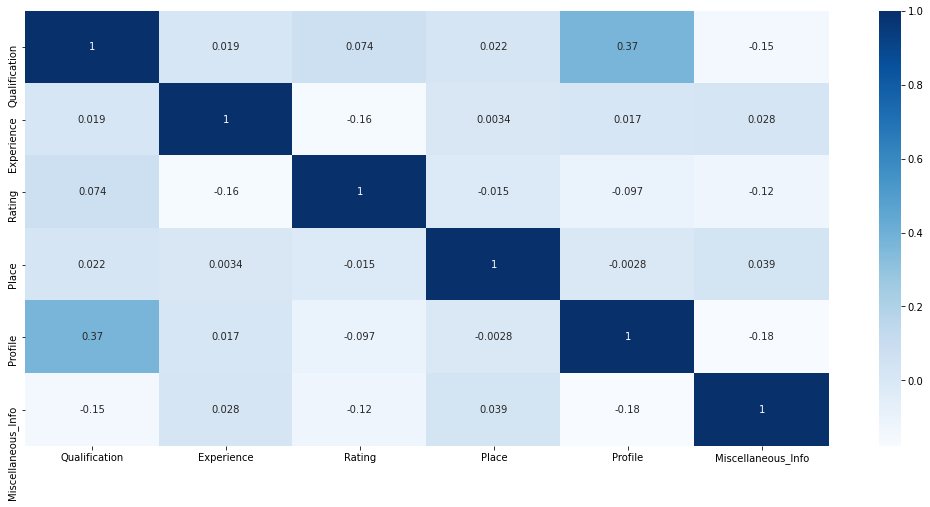

In [228]:
plt.figure(figsize=(18,8))
sns.heatmap(df_cor,cmap='Blues',annot=True)

<AxesSubplot:>

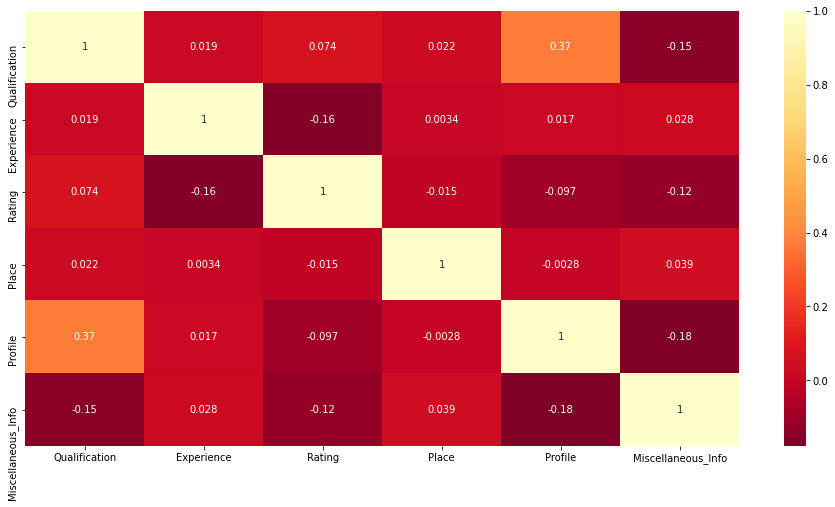

In [229]:
plt.figure(figsize=(16,8))
sns.heatmap(df_cor,cmap='YlOrRd_r',annot=True)

In [230]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

<AxesSubplot:xlabel='Qualification', ylabel='Density'>

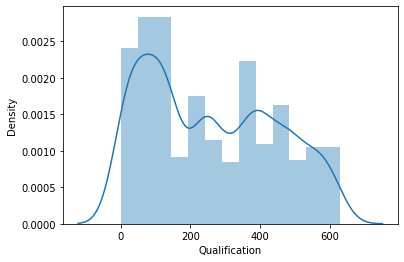

In [231]:
sns.distplot(df['Qualification'])

 skewness present.

<AxesSubplot:xlabel='Experience', ylabel='Density'>

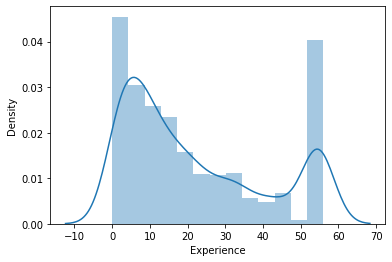

In [232]:
sns.distplot(df['Experience'])

 skewness present.

<AxesSubplot:xlabel='Rating', ylabel='Density'>

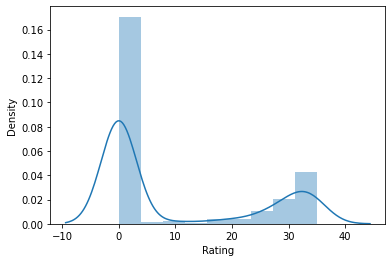

In [233]:
sns.distplot(df['Rating'])

skewness present.

<AxesSubplot:xlabel='Place', ylabel='Density'>

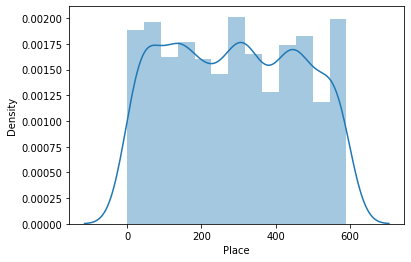

In [234]:
sns.distplot(df['Place'])

 skewness present.

<AxesSubplot:xlabel='Profile', ylabel='Density'>

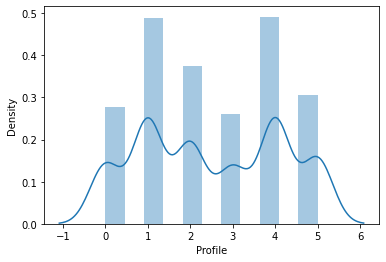

In [235]:
sns.distplot(df['Profile'])

 Skewness present.

<AxesSubplot:xlabel='Miscellaneous_Info', ylabel='Density'>

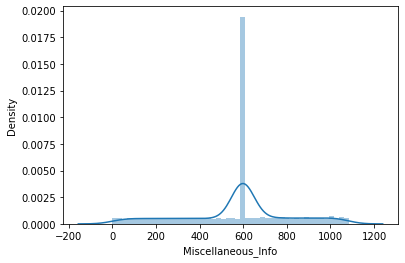

In [236]:
sns.distplot(df['Miscellaneous_Info'])

 Skewness present.

Skewness present.

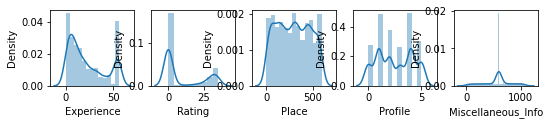

In [237]:
collist=df.columns.values
ncol=14
nrows=15
plt.figure(figsize=(25,25))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [238]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

<AxesSubplot:xlabel='Experience', ylabel='Qualification'>

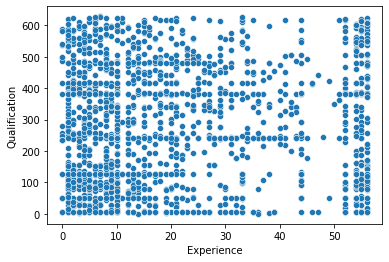

In [239]:
sns.scatterplot(x='Experience',y='Qualification',data=df)

Qualification is spreaded in 0 to 600 range.

<AxesSubplot:xlabel='Experience', ylabel='Rating'>

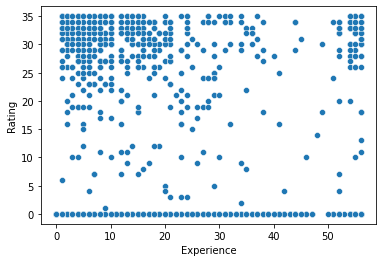

In [240]:
sns.scatterplot(x='Experience',y='Rating',data=df)


Rating is spreaded from 0 to 35 range.

<AxesSubplot:xlabel='Experience', ylabel='Place'>

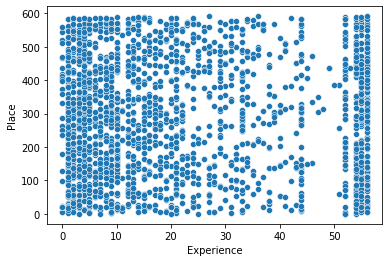

In [241]:
sns.scatterplot(x='Experience',y='Place',data=df)


Place is spreaded from 0 to 600 range.

<AxesSubplot:xlabel='Experience', ylabel='Profile'>

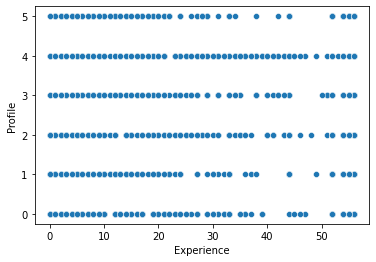

In [242]:
sns.scatterplot(x='Experience',y='Profile',data=df)


Profile is spreaded from 0 to 5 range.

<AxesSubplot:xlabel='Experience', ylabel='Miscellaneous_Info'>

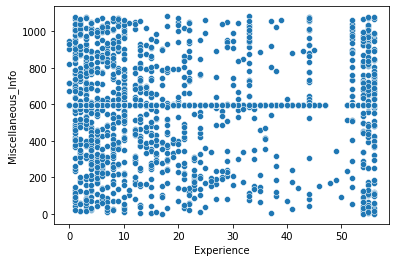

In [243]:

sns.scatterplot(x='Experience',y='Miscellaneous_Info',data=df)

Miscellaneous_Info is spreaded from 0 to 1000 range.

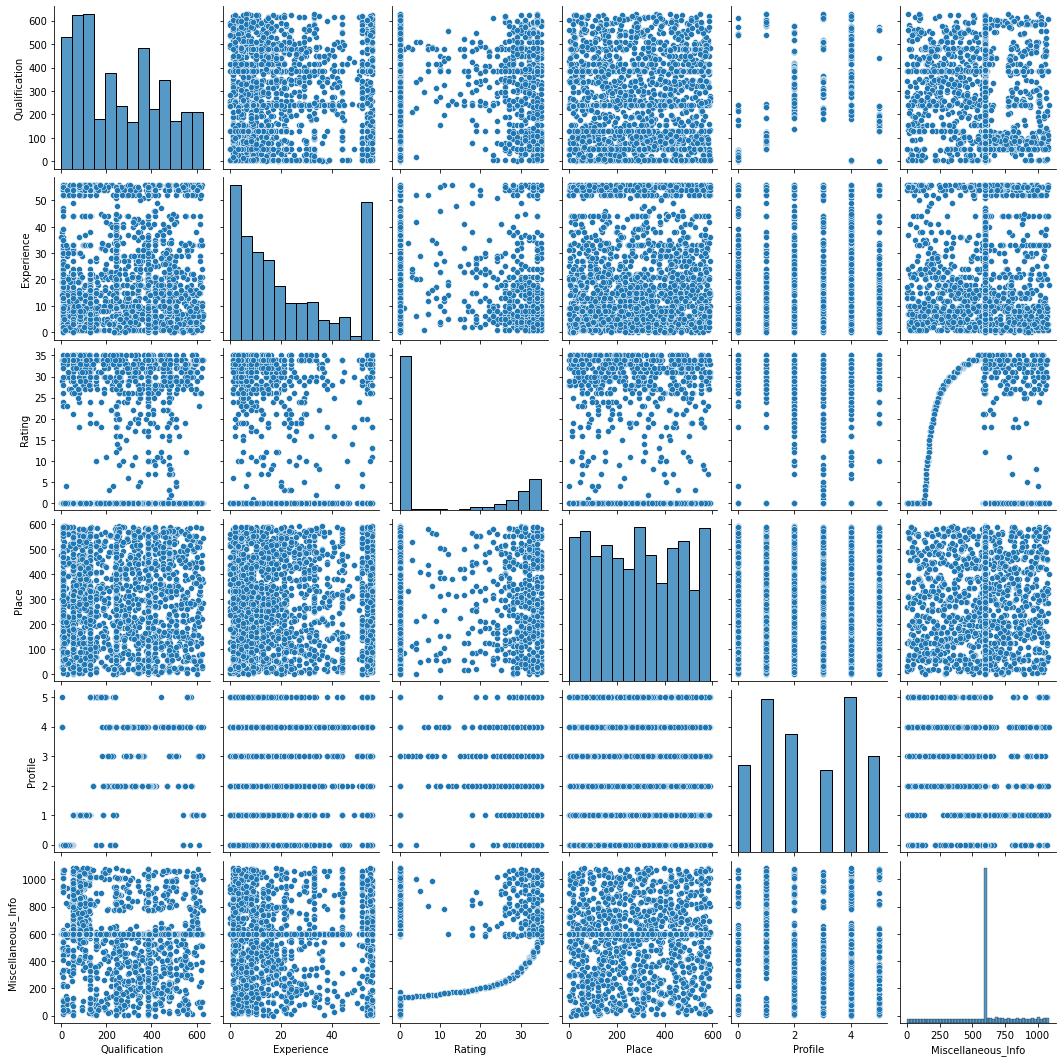

In [244]:
sns.pairplot(df)

In [245]:
df.dtypes

Qualification         int32
Experience            int32
Rating                int32
Place                 int32
Profile               int32
Miscellaneous_Info    int32
dtype: object

In [246]:
df.skew()

Qualification         0.280822
Experience            0.687595
Rating                0.850748
Place                 0.046487
Profile               0.028926
Miscellaneous_Info   -0.309475
dtype: float64

skewness present in Rating and Experiece.

# Removing Skewness

In [247]:
df['Rating']=np.log1p(df['Rating'])

In [248]:
df.skew()

Qualification         0.280822
Experience            0.687595
Rating                0.723090
Place                 0.046487
Profile               0.028926
Miscellaneous_Info   -0.309475
dtype: float64

In [249]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

<AxesSubplot:>

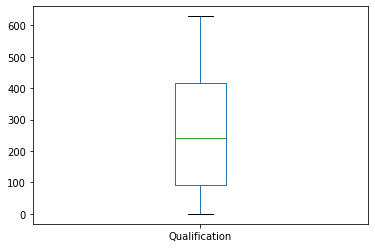

In [250]:
df['Qualification'].plot.box()

 NO outliers present.

<AxesSubplot:>

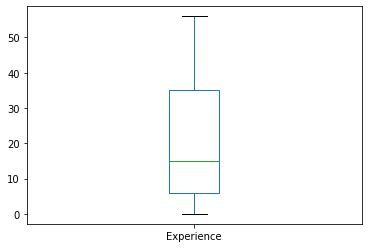

In [251]:
df['Experience'].plot.box()

 No outliers present.

<AxesSubplot:>

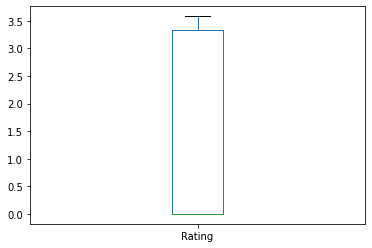

In [252]:
df['Rating'].plot.box()

No outliers present.

<AxesSubplot:>

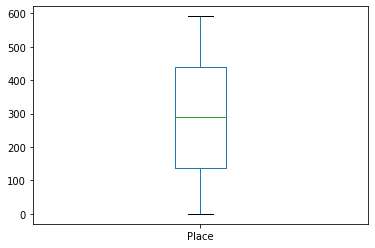

In [253]:
df['Place'].plot.box()

No outliers present.

<AxesSubplot:>

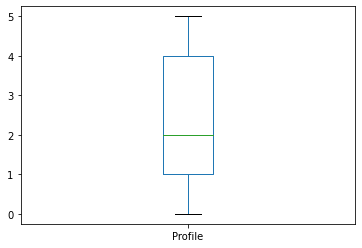

In [254]:
df['Profile'].plot.box()

No outliers present.

<AxesSubplot:>

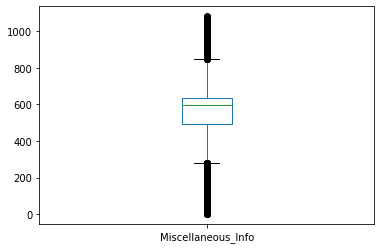

In [255]:
df['Miscellaneous_Info'].plot.box()

 outliers present.

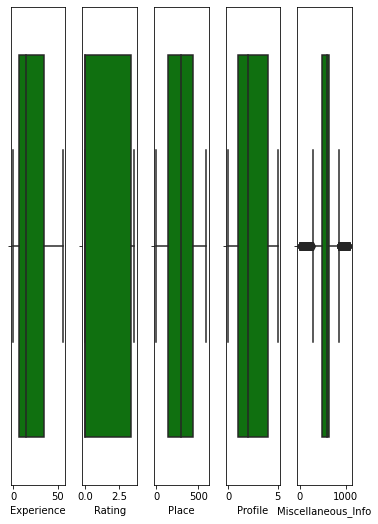

In [256]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,6*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Outliers present in Miscellaneous_Info.

In [257]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [258]:
df.dtypes

Qualification           int32
Experience              int32
Rating                float64
Place                   int32
Profile                 int32
Miscellaneous_Info      int32
dtype: object

# Removing Outliers

In [259]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [260]:
df1=df[(z<3).all(axis=1)]

In [261]:
df1.shape

(1987, 6)

In [262]:
df.shape

(1987, 6)

No outliers are present in Dataframe.

In [263]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,241,28,0.000000,142,4,598
1,340,24,0.000000,580,3,598
2,258,34,2.302585,212,2,153
3,6,0,0.000000,374,0,598
4,79,7,0.000000,231,1,816


# Testing the model

In [268]:
import joblib
file=joblib.load('doctor.obj')

In [269]:
predicted=file.predict(df)

In [270]:
predicted

array([  814.16871227,   802.13635496,  -993.52705051, ...,
         818.93103166, -1975.56023851,   795.36318767])

In [271]:

np.savetxt('doctortest.csv',predicted ,delimiter=',')